# XGBoost


XGBoost(Extreme Gradient Boosting)는 **성능과 속도**를 극대화한 **Gradient Boosting 기반 앙상블 모델**로, Kaggle 등 경진대회에서 널리 사용된다.


https://xgboost.readthedocs.io/en/stable/index.html


| 특징                       | 설명                                 |
| ------------------------ | ---------------------------------- |
| **Gradient Boosting 기반** | 이전 트리의 오차를 보정하는 방식으로 순차적으로 트리 추가   |
| **정규화 (L1, L2)**         | 과적합 방지를 위한 가중치 패널티                 |
| **Early Stopping**       | 검증 성능이 향상되지 않으면 학습 조기 종료           |
| **Sparsity Awareness**   | 결측값/희소행렬 자동 처리                     |
| **병렬 처리**                | 멀티코어 CPU 및 GPU 지원                  |
| **확장성**                  | 대규모 데이터셋 처리 가능 (메모리 최적화, 디스크 학습 등) |


**작동 방식**


* 여러 개의 **결정 트리**를 순차적으로 학습
* **잔차(오차)**를 줄이는 방향으로 새로운 트리 추가
* **손실 함수의 2차 미분**까지 활용해 정밀한 최적화 수행


**대표 손실 함수**


| 문제 유형 | 손실 함수 예                  |
| ----- | ------------------------ |
| 회귀    | `reg:squarederror` (MSE) |
| 이진 분류 | `binary:logistic`        |
| 다중 분류 | `multi:softprob` 등       |


**핵심 하이퍼파라미터**


| 파라미터            | 설명                 |
| --------------- | ------------------ |
| `learning_rate` | 학습률 (작을수록 안정적, 느림) |
| `n_estimators`  | 트리 개수              |
| `max_depth`     | 트리 최대 깊이 (과적합 조절)  |
| `objective`     | 손실 함수 선택           |

In [1]:
%pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [2]:
import xgboost
xgboost.__version__

'3.1.2'

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 분류

In [4]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split


X, y = load_iris(return_X_y=True, as_frame=True)
print(type(X), type(y))


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42, stratify=y_train)
# X_train 10%를 검증용으로 두고, 그거를 기반으로 지표를 만들어서 하기 위해서 쪼갬

print(X_tr.shape, y_tr.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)




<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>
(108, 4) (108,)
(12, 4) (12,)
(30, 4) (30,)


In [5]:
# 모델 학습
# xgboost에서는 sklearn과 비슷한 api 제공

from xgboost import XGBClassifier
xgb_clf = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    early_stopping_rounds=10,
    eval_metric='mlogloss', # 다중분류용 로그손실
)

xgb_clf.fit(X_tr, y_tr,
            eval_set=[(X_tr, y_tr), (X_val, y_val)],
            verbose=True)

[0]	validation_0-mlogloss:0.96808	validation_1-mlogloss:0.96210
[1]	validation_0-mlogloss:0.85853	validation_1-mlogloss:0.84769
[2]	validation_0-mlogloss:0.76530	validation_1-mlogloss:0.75044
[3]	validation_0-mlogloss:0.68513	validation_1-mlogloss:0.66742
[4]	validation_0-mlogloss:0.61563	validation_1-mlogloss:0.59501
[5]	validation_0-mlogloss:0.55500	validation_1-mlogloss:0.53191
[6]	validation_0-mlogloss:0.50183	validation_1-mlogloss:0.47661
[7]	validation_0-mlogloss:0.45500	validation_1-mlogloss:0.42795
[8]	validation_0-mlogloss:0.41361	validation_1-mlogloss:0.38496
[9]	validation_0-mlogloss:0.37707	validation_1-mlogloss:0.34689
[10]	validation_0-mlogloss:0.34455	validation_1-mlogloss:0.31305
[11]	validation_0-mlogloss:0.31554	validation_1-mlogloss:0.28292
[12]	validation_0-mlogloss:0.28961	validation_1-mlogloss:0.25603
[13]	validation_0-mlogloss:0.26639	validation_1-mlogloss:0.23199
[14]	validation_0-mlogloss:0.24556	validation_1-mlogloss:0.21047
[15]	validation_0-mlogloss:0.22686	

,objective,'multi:softprob'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,10
,enable_categorical,False
,eval_metric,'mlogloss'


In [6]:
from sklearn.metrics import classification_report, root_mean_squared_error

print('Train Accuracy: ', xgb_clf.score(X_tr, y_tr))
print('Test Accuracy: ', xgb_clf.score(X_val, y_val))

print(classification_report(y_test, xgb_clf.predict(X_test)))

Train Accuracy:  1.0
Test Accuracy:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      0.90      0.90        10
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



## plot_importance()

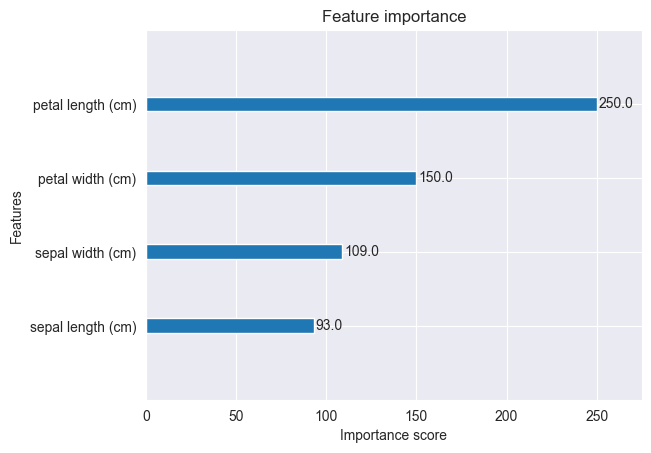

In [7]:
from xgboost import plot_importance
plot_importance(xgb_clf) # 특성 중요도를 그래프로 그려주는 함수
plt.show()

# 회귀

In [9]:
# 캘리포니아 집값 예측
from sklearn.datasets import fetch_california_housing

X, y = fetch_california_housing(return_X_y=True, as_frame=True)
print(type(X), type(y))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X.head()


<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [14]:
# 모델 학습
from xgboost import XGBRegressor
from sklearn.metrics import root_mean_squared_error

xgb_reg = XGBRegressor(
    n_estimators=100, # 트리 개수
    learning_rate=0.1, # 한번에 얼마나 반영할것인가
    max_depth=5,
    random_state=42,
    objective = 'reg:squarederror', # 목적함수(손실함수)를 최소화 목표 (실제로 영향을 줌)
    # eval_metric = 'rmse' # 훈련중에 출력해서 보는 평가 지표 (실제 학습에 영향을 주는 것 X) 있나 없나 똑같다.
    # 참고: objectve = 학습 규칙 / eval_metric : 평가 지표


)

xgb_reg.fit(X_train, y_train)

# 평가
print(f'Train R2: {xgb_reg.score(X_train, y_train): .4f}')
print(f'Train RMSE: {root_mean_squared_error(y_train, xgb_reg.predict(X_train)): .4f}')


print(f'Test R2: {xgb_reg.score(X_test, y_test): .4f}')
print(f'Test RMSE: {root_mean_squared_error(y_test, xgb_reg.predict(X_test)): .4f}')

Train R2:  0.8664
Train RMSE:  0.4226
Test R2:  0.8141
Test RMSE:  0.4936
